In [12]:
import pandas as pd  
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
%matplotlib inline

In [3]:
dades = pd.read_csv('C:/TEMP_UNI/Data/listings_Small.csv',sep=",")
dades

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,8665980,Lancaster suit,8940900,NaN,Ciutat Vella,el Raval,41.376981,2.174763,Entire home/apt,100,100,4,2015-11-01,1.32,1,363
1,732616,Big apartment near Plaza Catalunya,2967830,Mr. Dani P.R.,Ciutat Vella,el Raval,41.384710,2.165464,Entire home/apt,175,3,12,2015-09-18,0.37,4,357
2,8894189,Big Room Best Location of Barcelona,6981341,Leonardo Miguel,Ciutat Vella,el Raval,41.384136,2.170449,Private room,30,2,1,2015-11-16,0.61,1,215
3,2284413,Ramblas for Comfort 2A,9786902,Penélope,Ciutat Vella,el Raval,41.380167,2.173403,Entire home/apt,95,2,43,2015-12-16,2.03,4,54
4,2411575,Cozy sunny apt. in the heart of BCN,4193907,Julia,Ciutat Vella,el Raval,41.382677,2.166005,Private room,40,2,54,2015-12-31,2.57,2,324
5,10205997,RAMBLAS (100m) - Cozy Flat+Balcony,23737511,Vlc,Ciutat Vella,el Raval,41.377817,2.175862,Entire home/apt,95,2,0,NaN,NaN,2,90
6,2247805,Super Cozy room in center Barcelona,11392371,Dina,Ciutat Vella,el Raval,41.379399,2.169040,Private room,20,1,63,2015-12-19,2.70,2,33
7,10079400,NICE APARTMENT IN RAVAL.,51719944,Franco,Ciutat Vella,el Raval,41.379433,2.168459,Entire home/apt,40,2,0,NaN,NaN,1,327
8,5001178,Cozy bedroom in city centre,4816047,Aleona,Ciutat Vella,el Raval,41.383820,2.164719,Private room,30,2,6,2015-10-05,0.62,2,335
9,4377897,Gòtic getaway,15512663,NaN,Ciutat Vella,el Raval,41.379807,2.174466,Private room,40,2,14,2015-10-03,1.42,1,364


In [4]:
# for a user input , meanwhile testing with a fixed point 
# var1 = input('Enter latitude ')
# var2 = input('Enter longitude')
var1 = 41.38696774281957
var2 = 2.1702826023101807
varMaxLatitude = var1 + 0.004
varMaxLongitude = var2 + 0.004
varMinLatitude = var1 - 0.004
varMinLongitude = var2 - 0.004
print "varMaxLatitude = ",varMaxLatitude
print "varMaxLongitude = ",varMaxLongitude
print "varMinLatitude = ",varMinLatitude
print "varMinLongitude = ", varMinLongitude

varMaxLatitude =  41.3909677428
varMaxLongitude =  2.17428260231
varMinLatitude =  41.3829677428
varMinLongitude =  2.16628260231


In [20]:
def insideFunction(latitude,longitude):
    if(latitude <= varMaxLatitude and latitude >= varMinLatitude and
      longitude <= varMaxLongitude and longitude >= varMinLongitude):
        return True
    return False

def latitudeFunction(latitude):
    if(latitude <= varMaxLatitude and latitude >= varMinLatitude):
        return True
    return False

def longitudeFunction(longitude):
    if(longitude <= varMaxLongitude and longitude >= varMinLongitude):
        return True
    return False

In [5]:
columnNames = ['id','latitude','longitude','price']
dadesSmall = dades[columnNames]

In [6]:
#dadesSmall[longitudeFunction(dadesSmall.longitude)]
#dadesSmall[dadesSmall.longitude<= varMaxLongitude]
mask = (dadesSmall["latitude"] <= varMaxLatitude) & (dadesSmall["latitude"] >= varMinLatitude) & (dadesSmall["longitude"] <= varMaxLongitude) & (dadesSmall["longitude"] >= varMinLongitude)

In [26]:
output = dadesSmall[mask]
output["price"].median()
print output.columns
output.head()

Index([u'id', u'latitude', u'longitude', u'price'], dtype='object')


,id,latitude,longitude,price
2,8894189,41.384136,2.170449,30
44,8476682,41.384635,2.170357,80
50,6104142,41.385551,2.168147,99
51,8968776,41.385013,2.166681,90
70,3690816,41.384263,2.169609,125


In [49]:
cpoutput = dadesSmall[mask]
cpoutput.head()

,id,latitude,longitude,price
2,8894189,41.384136,2.170449,30
44,8476682,41.384635,2.170357,80
50,6104142,41.385551,2.168147,99
51,8968776,41.385013,2.166681,90
70,3690816,41.384263,2.169609,125


In [50]:
cpoutput.drop(cpoutput.columns[[0,1,2]], axis=1, inplace=True)
cpoutput.head()


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,price
2,30
44,80
50,99
51,90
70,125


[0, 500, 0, 27]

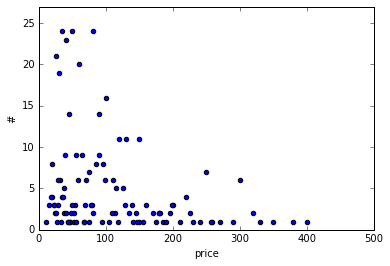

In [65]:
plotData = pd.DataFrame(cpoutput.stack().value_counts())
plt.scatter(plotData.index,plotData.values)  # Plot the raw data
plt.xlabel("price")
plt.ylabel("#")
plt.axis([0, 500, 0, 27])  # removed above 500 price 

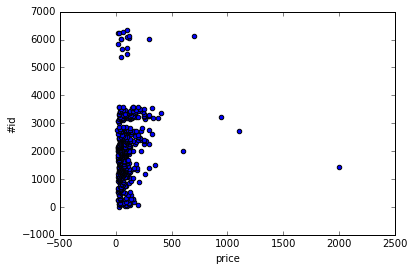

In [18]:
fb=output["price"]
plt.scatter(fb.values,fb.index)  # Plot the raw data
plt.xlabel("price")
plt.ylabel("#id")

# Prototype of simple price by zone 

In [13]:
def CalculateMeanPriceOfZone(latitude,longitude):
    varMaxLatitude = latitude + 0.004
    varMaxLongitude = longitude + 0.004
    varMinLatitude = latitude - 0.004
    varMinLongitude = longitude - 0.004
    mask = (dadesSmall["latitude"] <= varMaxLatitude) & (dadesSmall["latitude"] >= varMinLatitude) & (dadesSmall["longitude"] <= varMaxLongitude) & (dadesSmall["longitude"] >= varMinLongitude)
    output = dadesSmall[mask]
    return output["price"].mean()


In [14]:
def CalculateMedianPriceOfZone(latitude,longitude):
    varMaxLatitude = latitude + 0.004
    varMaxLongitude = longitude + 0.004
    varMinLatitude = latitude - 0.004
    varMinLongitude = longitude - 0.004
    mask = (dadesSmall["latitude"] <= varMaxLatitude) & (dadesSmall["latitude"] >= varMinLatitude) & (dadesSmall["longitude"] <= varMaxLongitude) & (dadesSmall["longitude"] >= varMinLongitude)
    output = dadesSmall[mask]
    return output["price"].median()


In [15]:
var1 = input('Enter latitude ')
var2 = input('Enter longitude')
print "The mean price of the zone is => ", CalculateMeanPriceOfZone(var1,var2)
print "The median price of the zone is => " ,CalculateMedianPriceOfZone(var1,var2)

Enter latitude 41.378613
Enter longitude2.165254
The mean price of the zone is =>  61.130702836
The median price of the zone is =>  50.0
